In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Step 1: Generate synthetic time series data
np.random.seed(42)
num_timesteps = 200
time = np.arange(num_timesteps)
traffic_load = 50 + 0.5 * time + 10 * np.sin(0.1 * time) + np.random.normal(0, 5, num_timesteps)


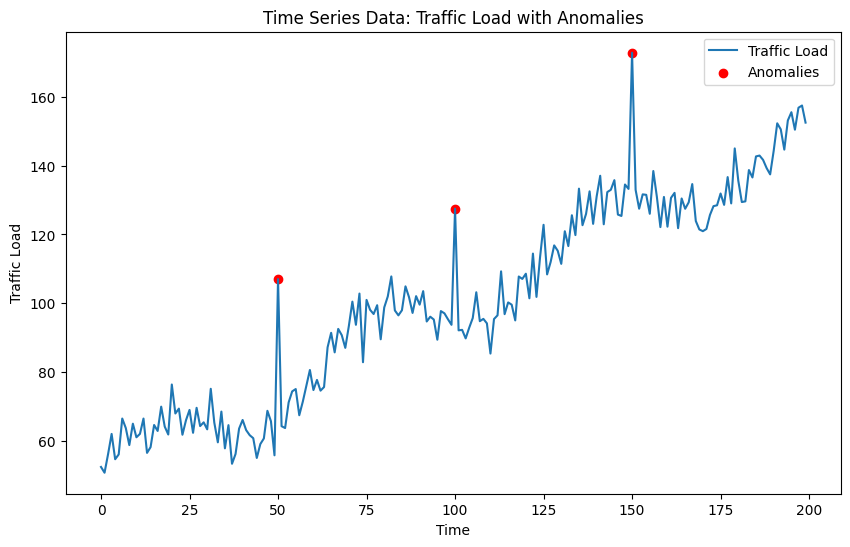

In [3]:
# Introduce some anomalies
anomaly_indices = [50, 100, 150]
traffic_load[anomaly_indices] += 40  # Add spikes

# Create a DataFrame
df = pd.DataFrame({
    "time": time,
    "traffic_load": traffic_load
})

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["traffic_load"], label="Traffic Load")
plt.scatter(anomaly_indices, df["traffic_load"][anomaly_indices], color="red", label="Anomalies")
plt.title("Time Series Data: Traffic Load with Anomalies")
plt.xlabel("Time")
plt.ylabel("Traffic Load")
plt.legend()
plt.show()

In [4]:
# Step 2: Fit an ARIMA model
# ARIMA(p, d, q):
model = ARIMA(df["traffic_load"], order=(5, 1, 0))  # Example: ARIMA(5, 1, 0)
model_fit = model.fit()


In [5]:
# Step 3: Make predictions
predictions = model_fit.predict(start=0, end=num_timesteps - 1, typ="levels")

In [6]:
# Step 4: Calculate residuals (difference between actual and predicted values)
residuals = df["traffic_load"] - predictions


In [7]:
# Step 5: Use Isolation Forests to detect anomalies
# Reshape residuals for Isolation Forest
residuals_reshaped = residuals.values.reshape(-1, 1)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Contamination = expected % of anomalies
anomalies = iso_forest.fit_predict(residuals_reshaped)

# Anomalies are marked as -1 by Isolation Forest
df["anomaly"] = anomalies == -1


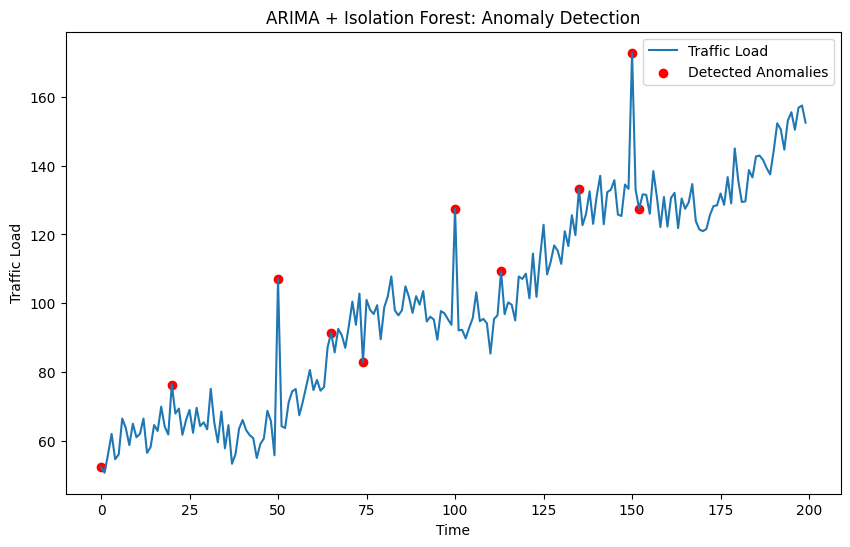

In [8]:
# Step 6: Evaluate and visualize anomalies
# Plot the time series with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.plot(df["time"], df["traffic_load"], label="Traffic Load")
plt.scatter(df["time"][df["anomaly"]], df["traffic_load"][df["anomaly"]], color="red", label="Detected Anomalies")
plt.title("ARIMA + Isolation Forest: Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Traffic Load")
plt.legend()
plt.show()

In [9]:
# Step 7: Print detected anomalies
print("Detected Anomalies:")
print(df[df["anomaly"]])

Detected Anomalies:
     time  traffic_load  anomaly
0       0     52.483571     True
20     20     76.421218     True
50     50    107.031177     True
65     65     91.432400     True
74     74     82.888355     True
100   100    127.482935     True
113   113    109.276018     True
135   135    133.287516     True
150   150    172.755343     True
152   152    127.463863     True
